In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 12)

## Load dataset

In [188]:
raw=pd.read_csv('datasets/all_bikez_raw.csv')
brands=pd.read_csv('datasets/bikez_brands.csv')
main=pd.read_csv('datasets/all_bikez_curated.csv')


/tmp/ipykernel_5576/4249817973.py:1: DtypeWarning: Columns (80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  raw=pd.read_csv('datasets/all_bikez_raw.csv')
/tmp/ipykernel_5576/4249817973.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  main=pd.read_csv('datasets/all_bikez_curated.csv')


In [189]:
main

,Brand,Model,Year,Category,Rating,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke,...,Dry weight (kg),Wheelbase (mm),Seat height (mm),Front brakes,Rear brakes,Front tire,Rear tire,Front suspension,Rear suspension,Color options
0,acabion,da vinci 650-vi,2011,Prototype / concept model,3.2,NaN,804.0,NaN,Electric,Electric,...,420.0,NaN,NaN,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
1,acabion,gtbo 55,2007,Sport,2.6,1300.0,541.0,420.0,In-line four,four-stroke,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,acabion,gtbo 600 daytona-vi,2011,Prototype / concept model,3.5,NaN,536.0,NaN,Electric,Electric,...,420.0,NaN,NaN,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
3,acabion,gtbo 600 daytona-vi,2021,Prototype / concept model,NaN,NaN,536.0,NaN,Electric,Electric,...,420.0,NaN,NaN,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
4,acabion,gtbo 70,2007,Prototype / concept model,3.1,1300.0,689.0,490.0,In-line four,four-stroke,...,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Custom made.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,zündapp,z 22,1924,Sport,NaN,211.0,2.3,NaN,Single cylinder,two-stroke,...,NaN,NaN,NaN,NaN,NaN,2.25-24,2.25-24,Druid fork,Rigid,NaN
38468,zündapp,z 249,1923,Sport,NaN,249.0,2.8,NaN,Single cylinder,two-stroke,...,76.0,NaN,NaN,Expanding brake (drum brake),Expanding brake (drum brake),2.25-24,2.25-24,Druid fork,Rigid,NaN
38469,zündapp,z 249,1924,Sport,NaN,249.0,2.8,NaN,Single cylinder,two-stroke,...,76.0,NaN,NaN,Expanding brake (drum brake),Expanding brake (drum brake),2.25-24,2.25-24,Druid fork,Rigid,NaN
38470,zündapp,z 300,1928,Sport,NaN,298.0,26.0,NaN,Single cylinder,two-stroke,...,105.0,NaN,NaN,Expanding brake (drum brake),Expanding brake (drum brake),2.85-26,2.85-26,NaN,NaN,NaN


## Exploring the data

1. Which brands are the most represented in the dataset?


<Axes: xlabel='Brand', ylabel='count'>

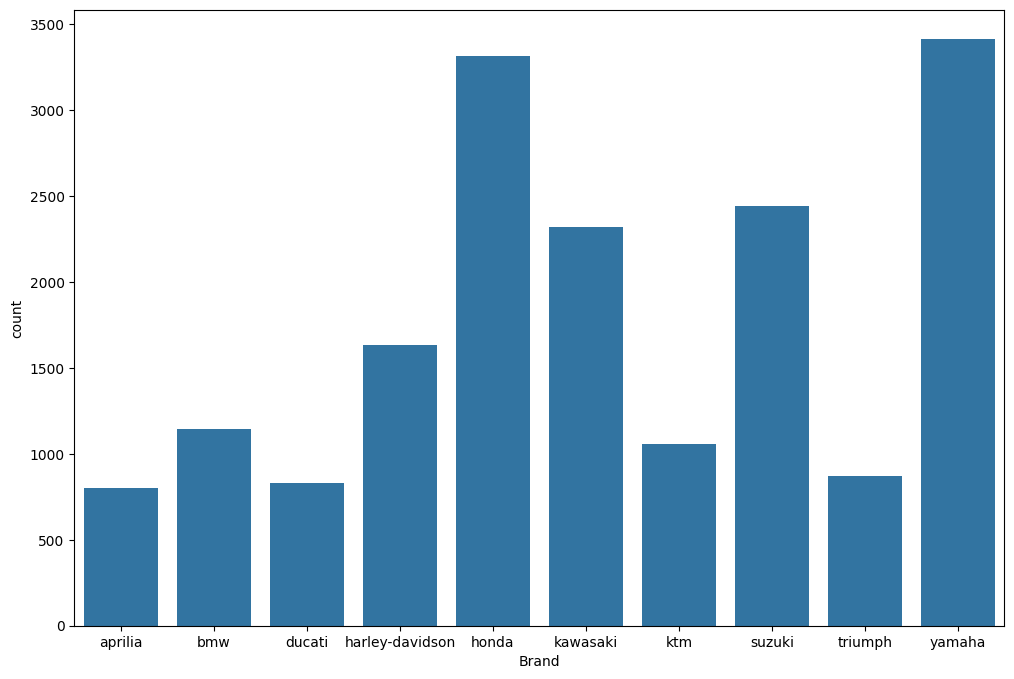

In [190]:
top_10_brands=main['Brand'].value_counts().nlargest(10).index
top_10_df=main[main['Brand'].isin(top_10_brands)]
plt.figure(figsize=(12,8))
sns.countplot(data=top_10_df,x='Brand',)

Yamaha is the most represented in the dataset.

2. What is the trend of motorcycle models released over the years?


Text(0, 0.5, 'Number of models')

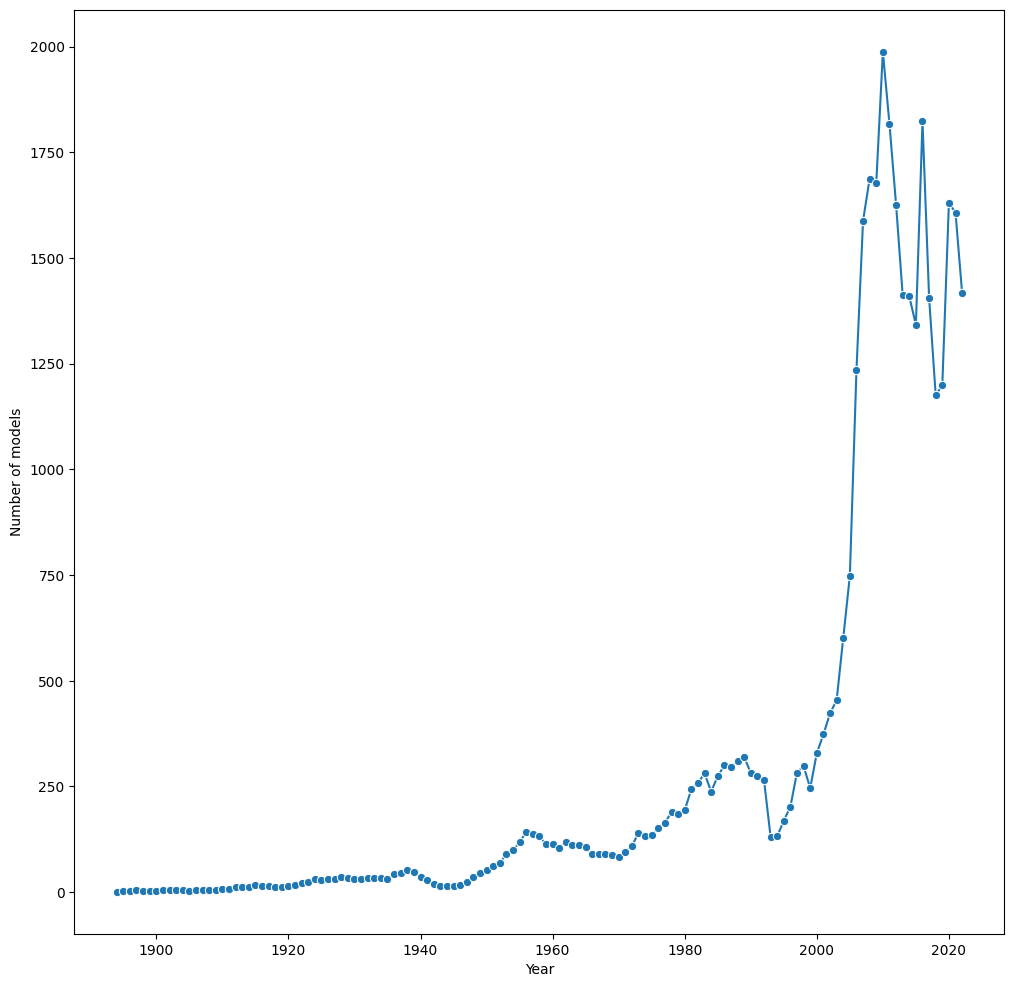

In [191]:
models_per_year = main['Year'].value_counts().sort_index()

sns.lineplot(models_per_year,marker='o')
plt.ylabel("Number of models")

3. What is the distribution of engine displacement (ccm) among motorcycles?


<Axes: xlabel='Displacement (ccm)', ylabel='Count'>

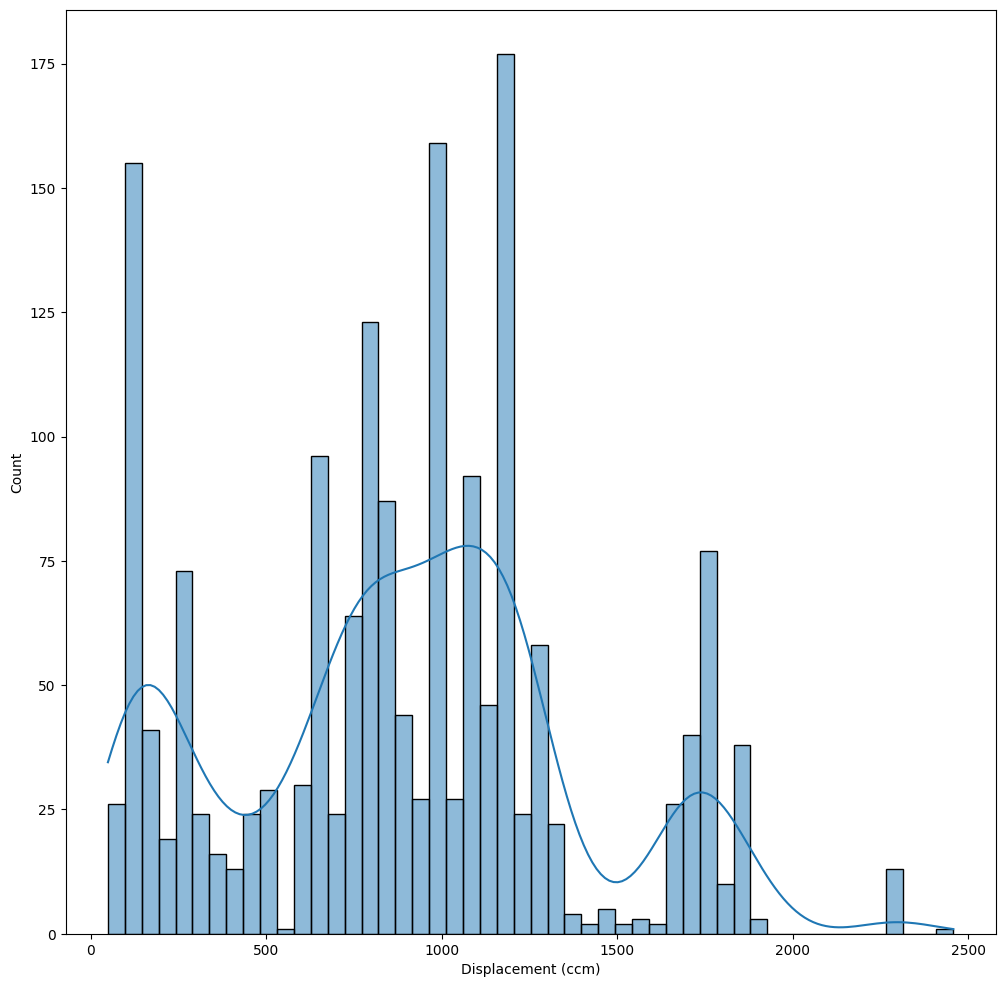

In [192]:

sns.histplot(data=main.dropna(),x='Displacement (ccm)',bins=50,kde=True)

4. Is there a correlation between engine displacement and power or torque?


<Axes: >

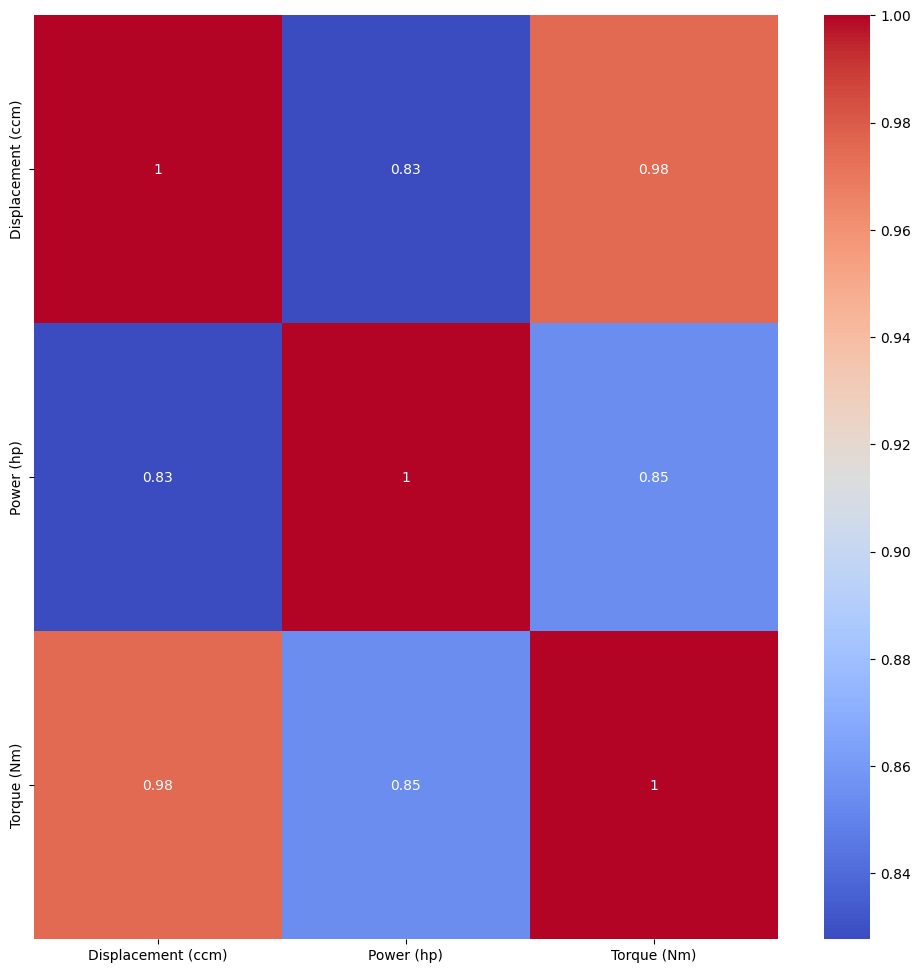

In [193]:
eng_corr=main[['Displacement (ccm)','Power (hp)','Torque (Nm)']].corr()
sns.heatmap(eng_corr,cmap='coolwarm',annot=True)

Yes. There is high correlation between Cc,Hp,Nm

5. How does fuel capacity vary across different categories of motorcycles (e.g., Sport, Cruiser, etc.)?


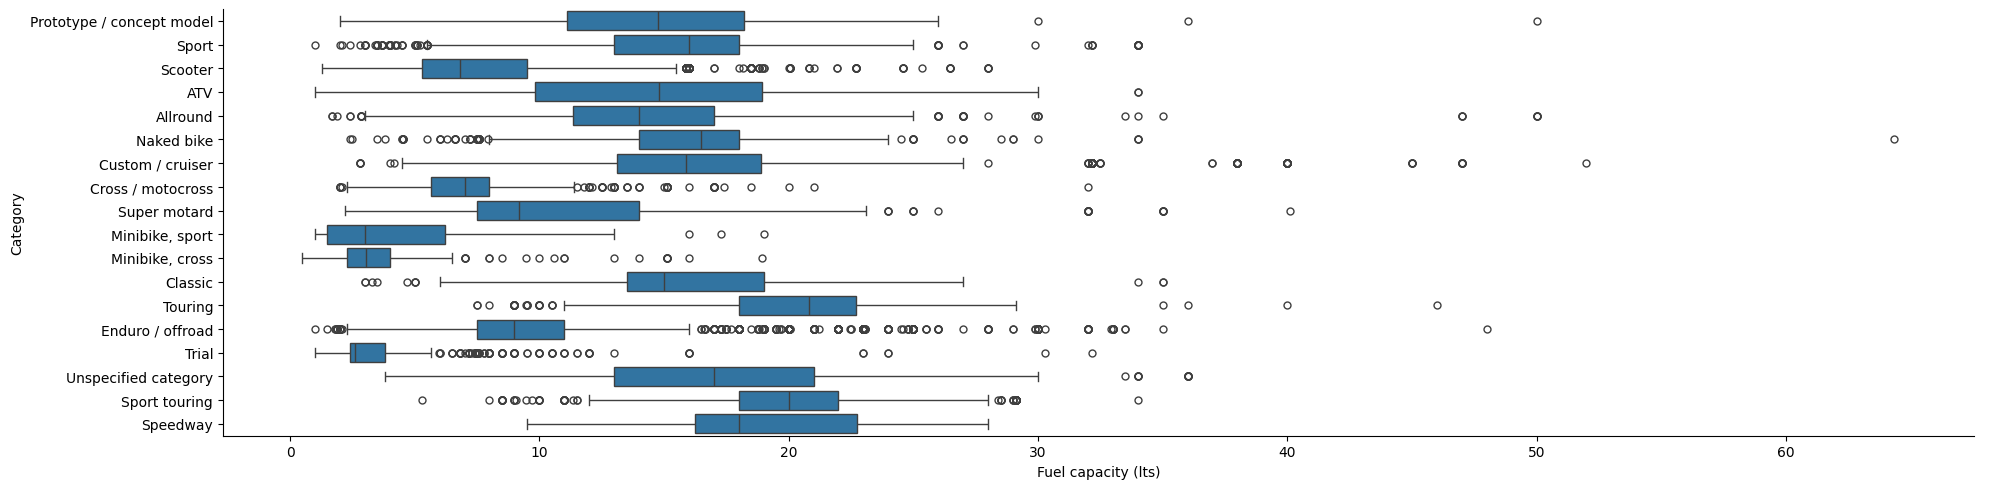

In [194]:
sns.catplot(data=main,x='Fuel capacity (lts)',y='Category',kind='box',aspect=4)

Touring has highest avg fuel capacity whereas trial bikes have the lowest avg fuel capacity

6. Which motorcycle categories have the highest average ratings?


In [195]:
main.groupby('Category')['Rating'].aggregate('mean')

Category
ATV                          3.422280
Allround                     3.413178
Classic                      3.474678
Cross / motocross            3.312381
Custom / cruiser             3.444768
Enduro / offroad             3.417092
Minibike, cross              3.166489
Minibike, sport              3.119672
Naked bike                   3.459638
Prototype / concept model    3.362903
Scooter                      3.248786
Speedway                     2.976923
Sport                        3.394799
Sport touring                3.494035
Super motard                 3.358284
Touring                      3.543060
Trial                        3.384651
Unspecified category         3.435023
Name: Rating, dtype: float64

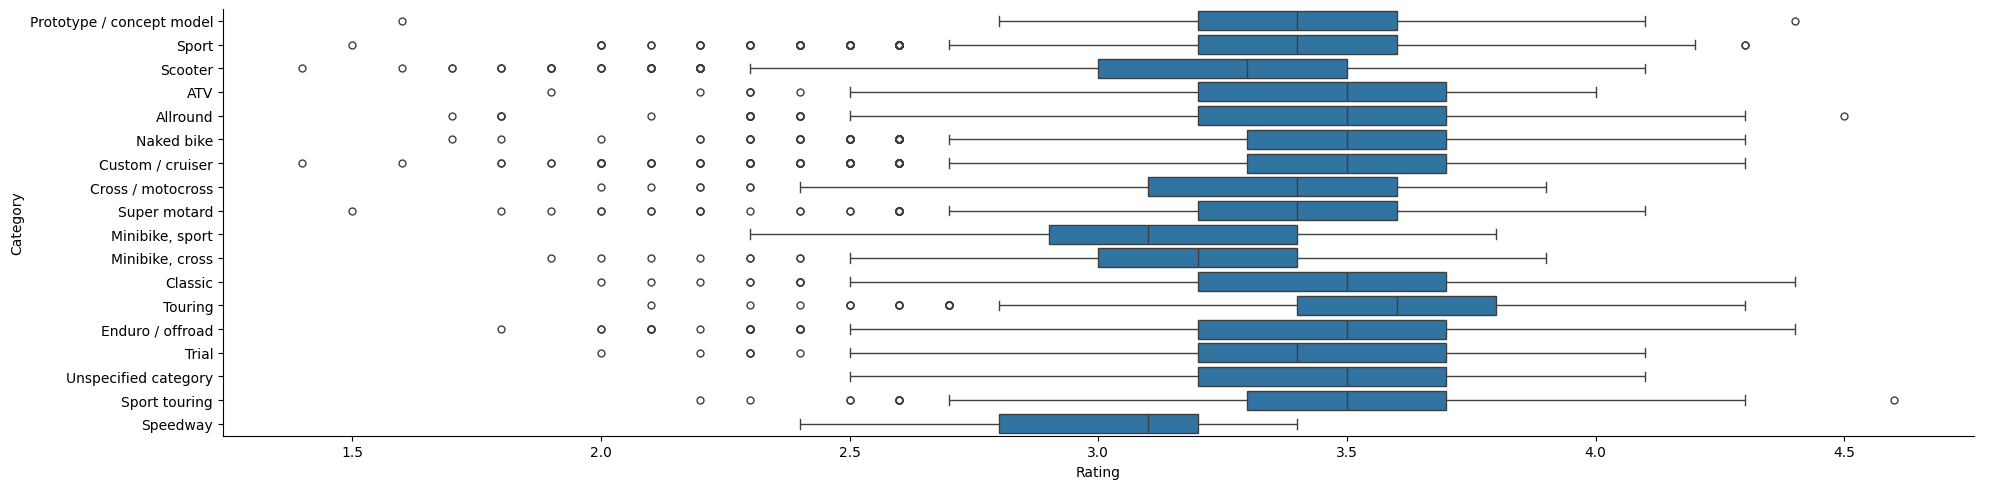

In [196]:
sns.catplot(data=main,y='Category',x='Rating',kind='box',aspect=4)

7. What is the distribution of dry weight, and how does it compare across categories?


<Axes: xlabel='Dry weight (kg)', ylabel='Count'>

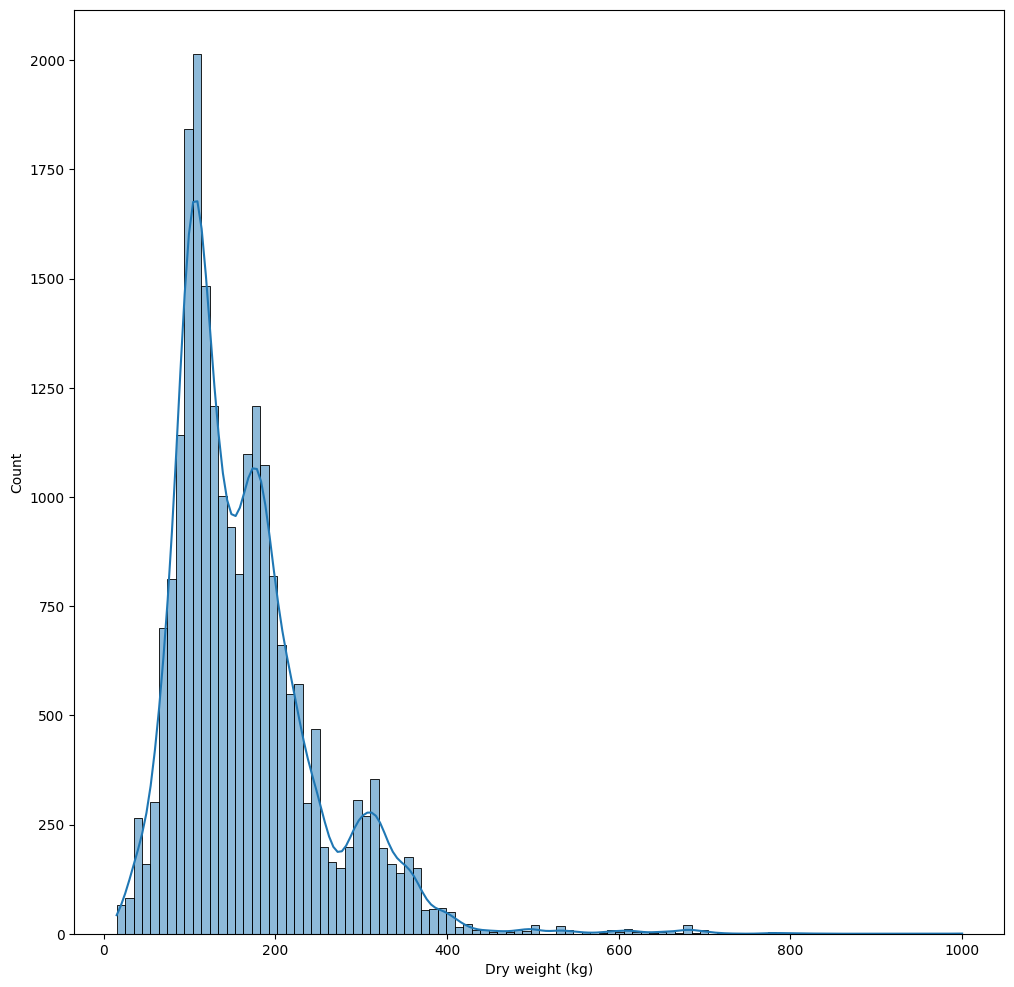

In [197]:
sns.histplot(data=main,x='Dry weight (kg)',bins=100,kde=True)

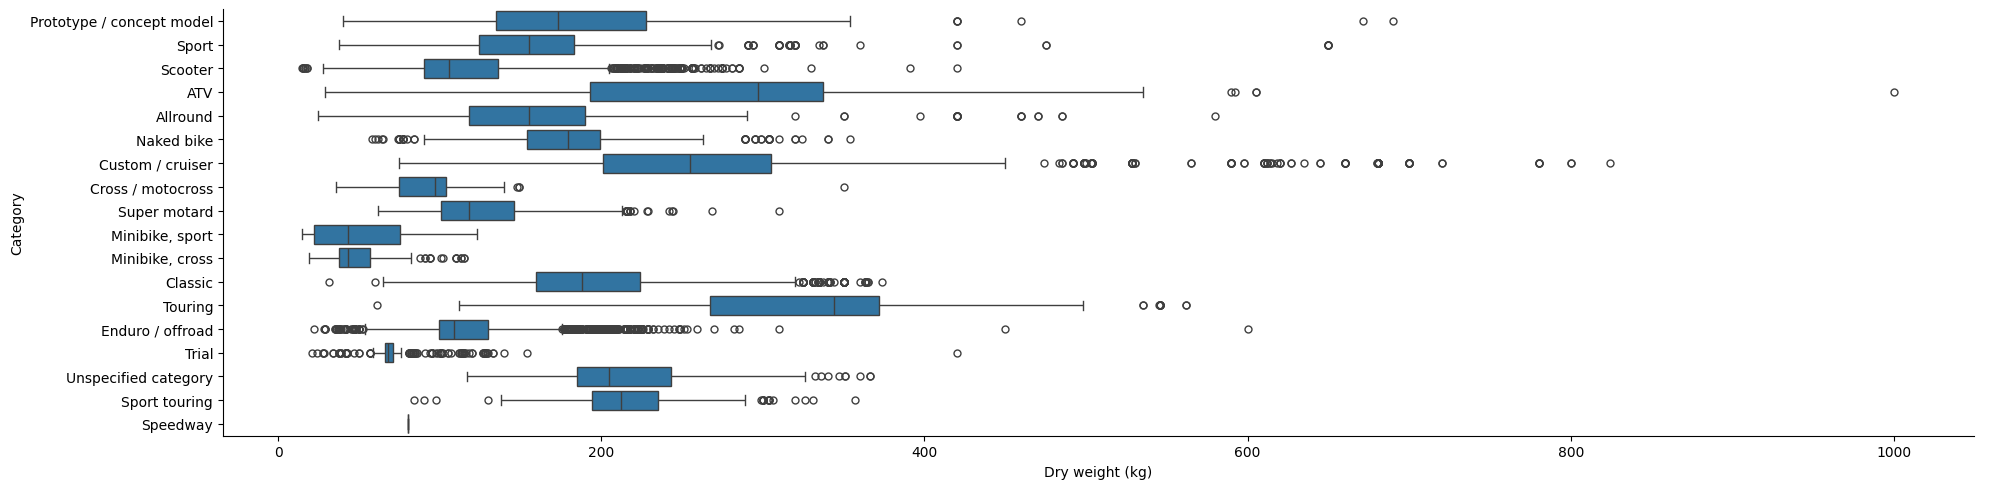

In [198]:
sns.catplot(data=main,y='Category',x='Dry weight (kg)',kind='box',aspect=4)

8. Which cooling systems are most common and how do they relate to engine performance (e.g., power, torque)?


<Axes: xlabel='Cooling system', ylabel='count'>

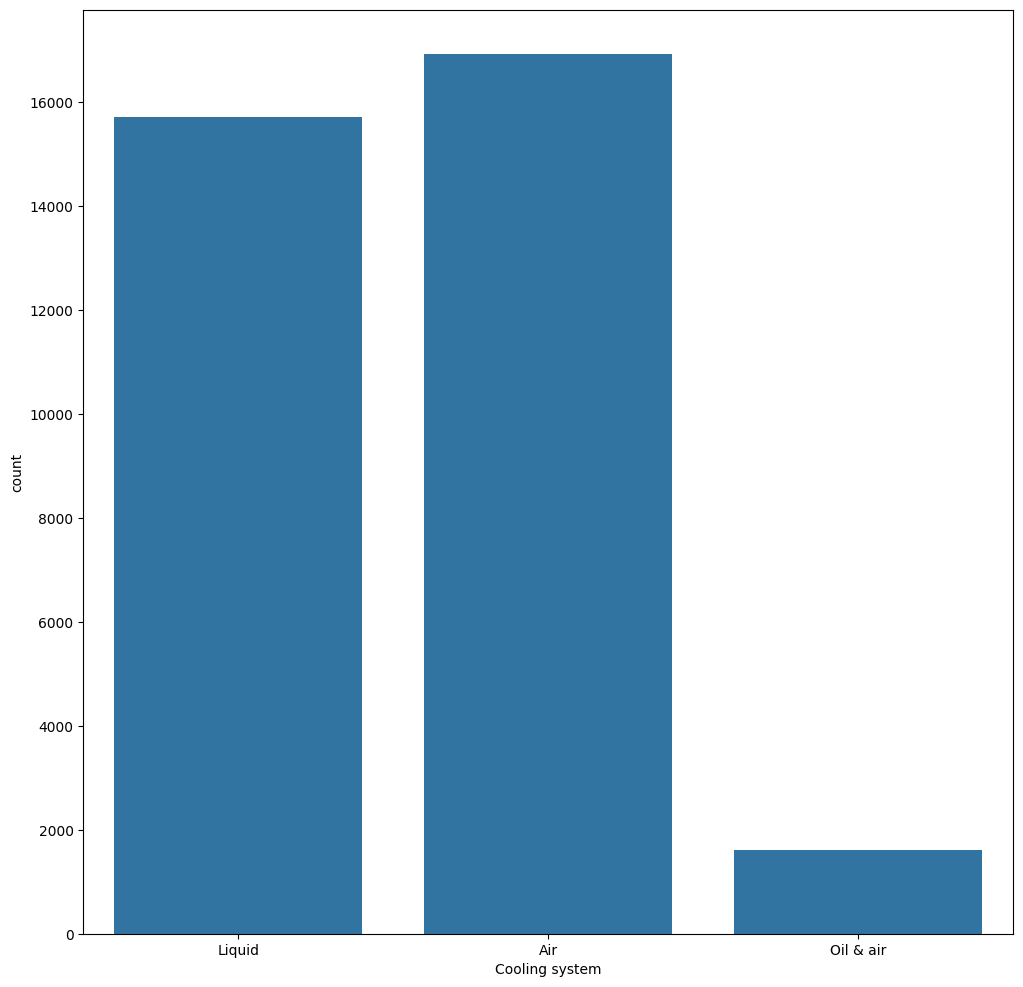

In [199]:
sns.countplot(data=main,x='Cooling system')

In [200]:
main.groupby('Cooling system')[['Power (hp)', 'Torque (Nm)']].mean().sort_values(by='Power (hp)', ascending=False)

,Power (hp),Torque (Nm)
Cooling system,,
Oil & air,82.278232,95.475973
Liquid,76.060968,76.402023
Air,29.586241,43.401188


## Power vs Cooling System

<Axes: xlabel='Cooling system', ylabel='Power (hp)'>

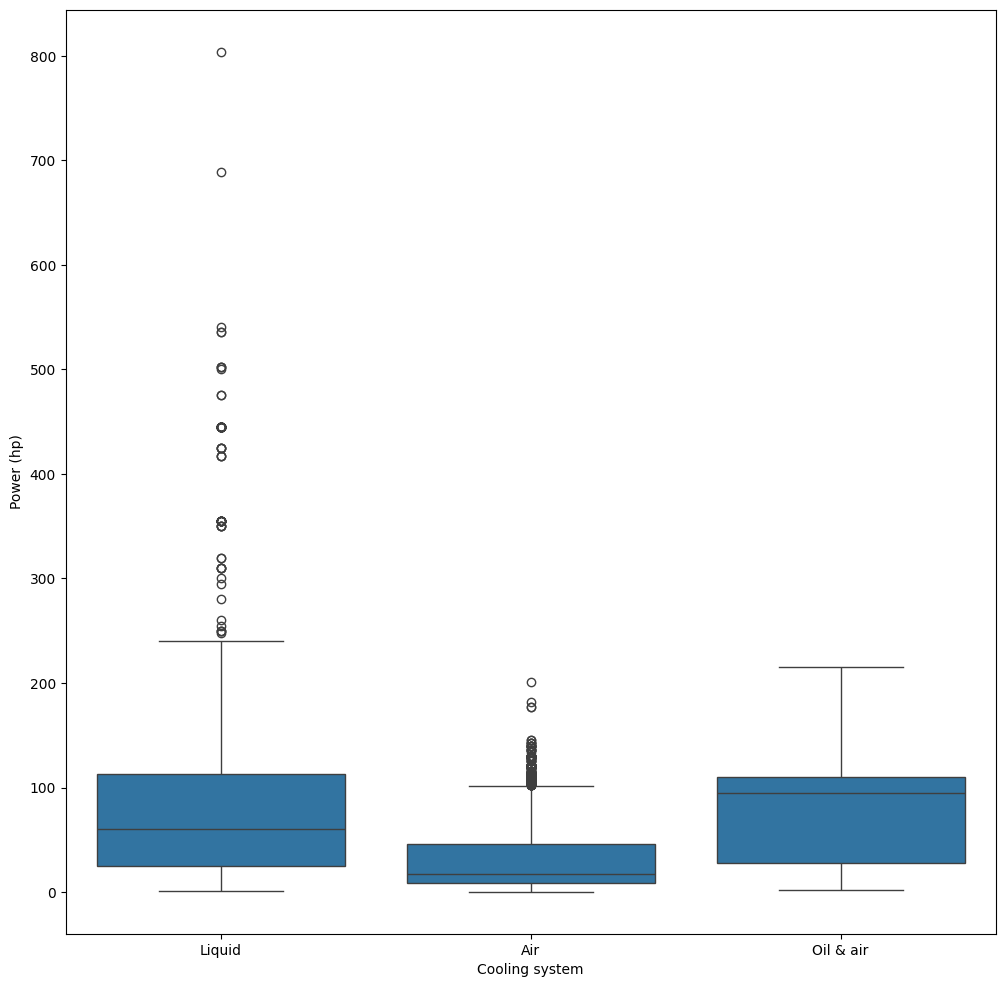

In [201]:
sns.boxplot(data=main,x='Cooling system',y='Power (hp)')

## Torque Vs Cooling System

<Axes: xlabel='Cooling system', ylabel='Torque (Nm)'>

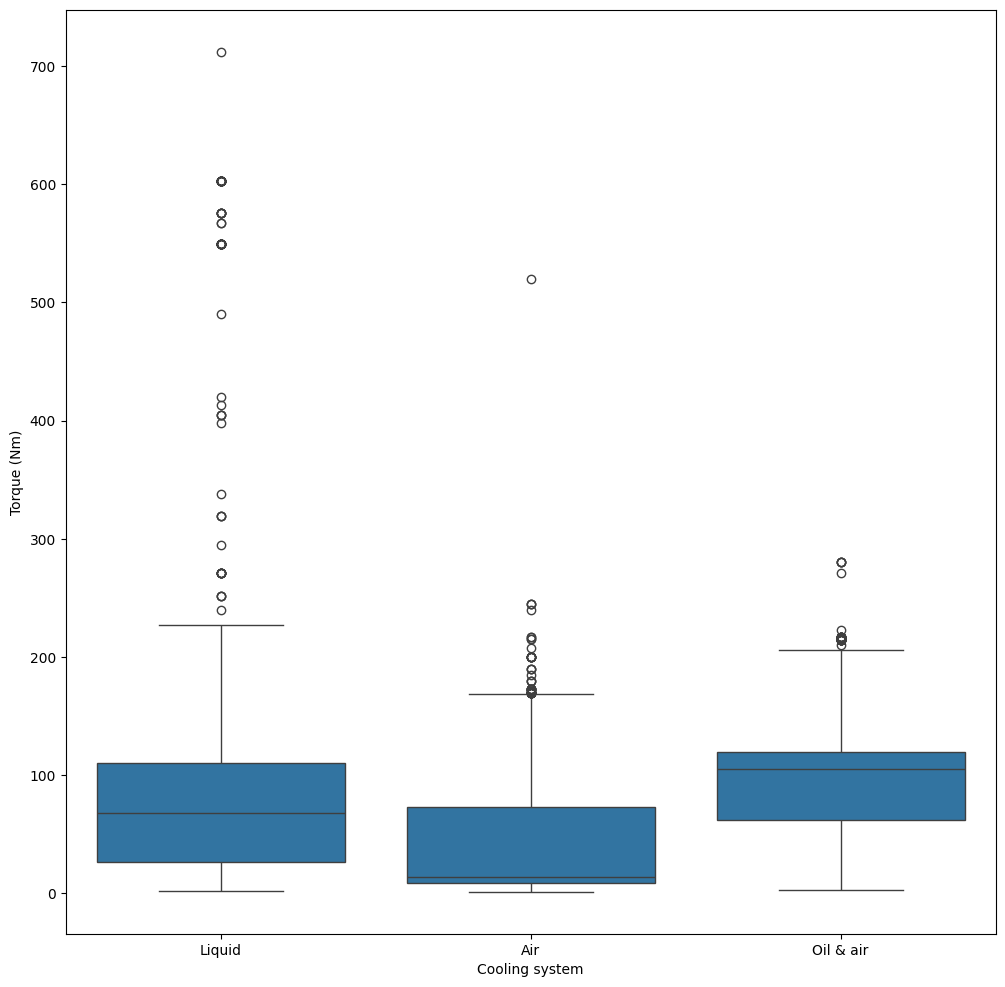

In [202]:
sns.boxplot(data=main,x='Cooling system',y='Torque (Nm)')

## Cooling system Vs Torque Vs Power summary

<Axes: xlabel='Power (hp)', ylabel='Torque (Nm)'>

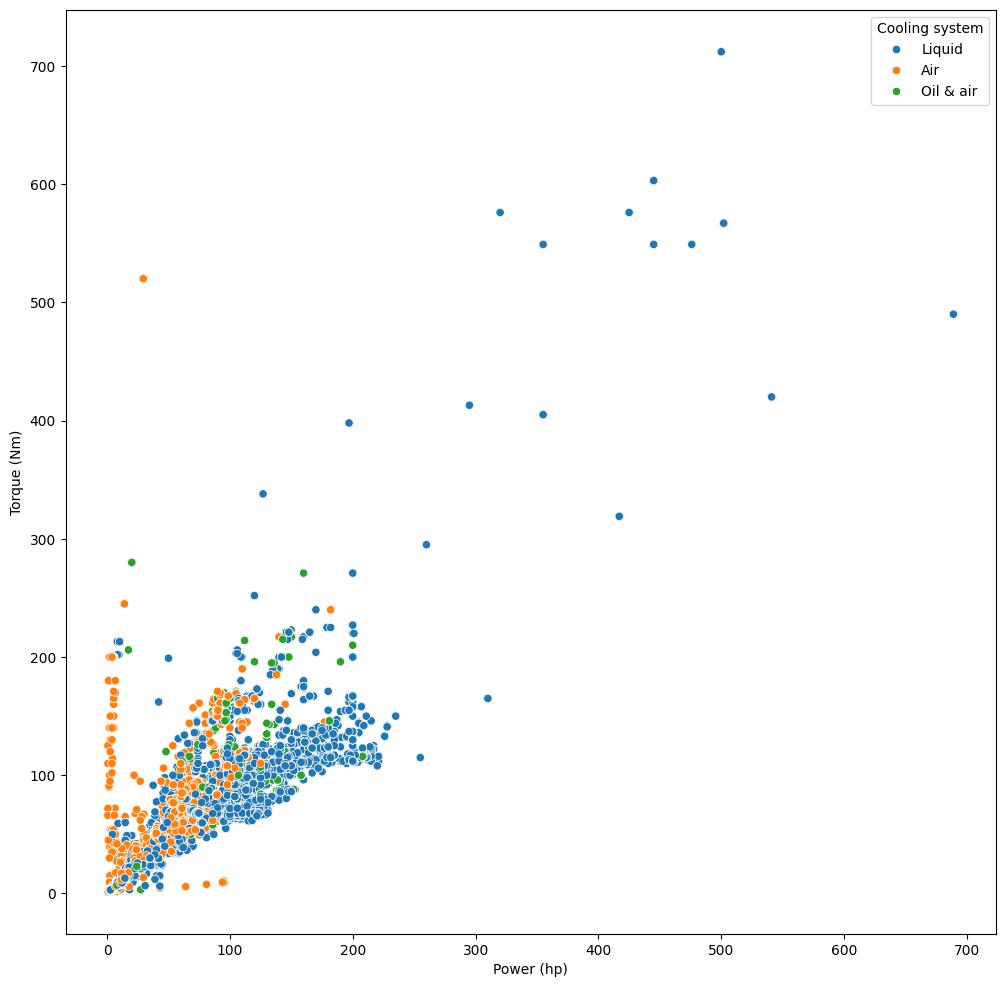

In [203]:
sns.scatterplot(data=main,x='Power (hp)',y='Torque (Nm)',hue='Cooling system')

9. Is there a relationship between seat height and wheelbase across different models?


<Axes: xlabel='Seat height (mm)', ylabel='Wheelbase (mm)'>

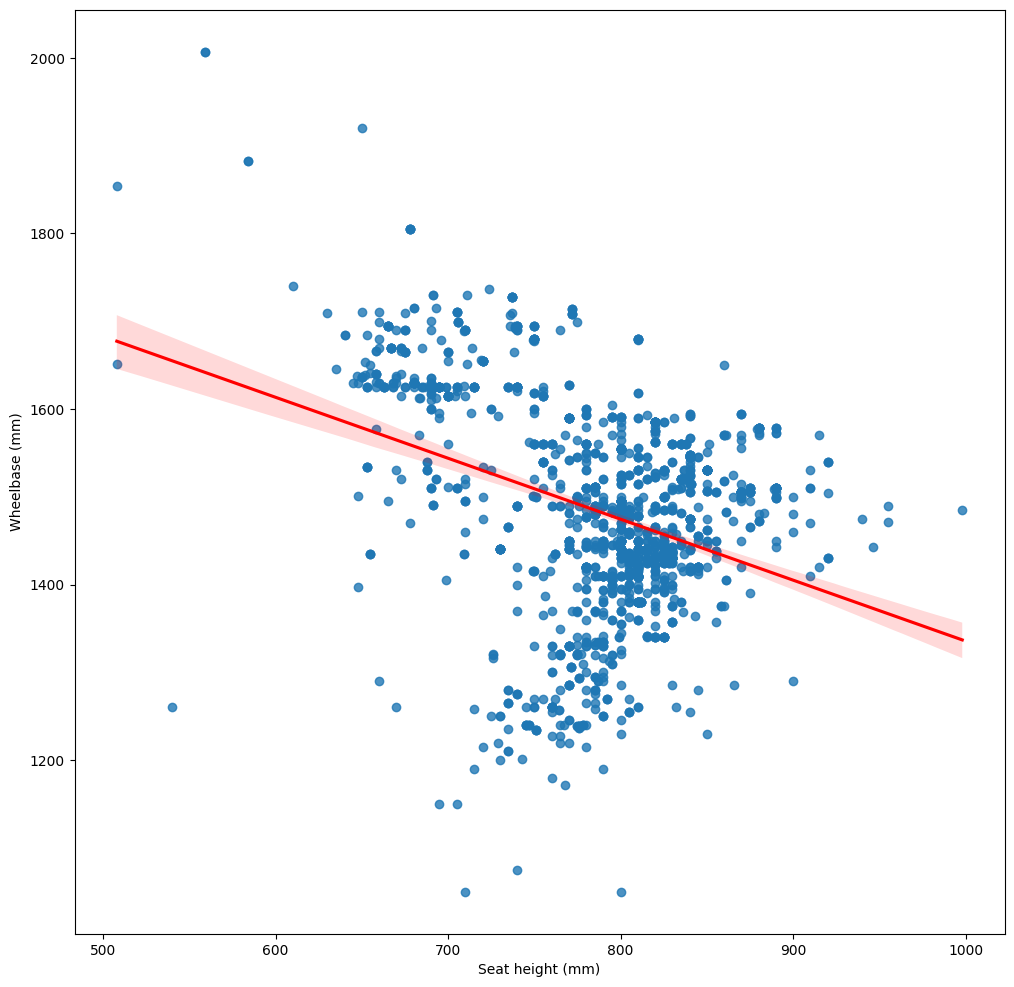

In [204]:
sns.regplot(data=main.dropna(),x='Seat height (mm)',y='Wheelbase (mm)', line_kws={'color': 'red'})

No relation

10.Distribution of cylinder types

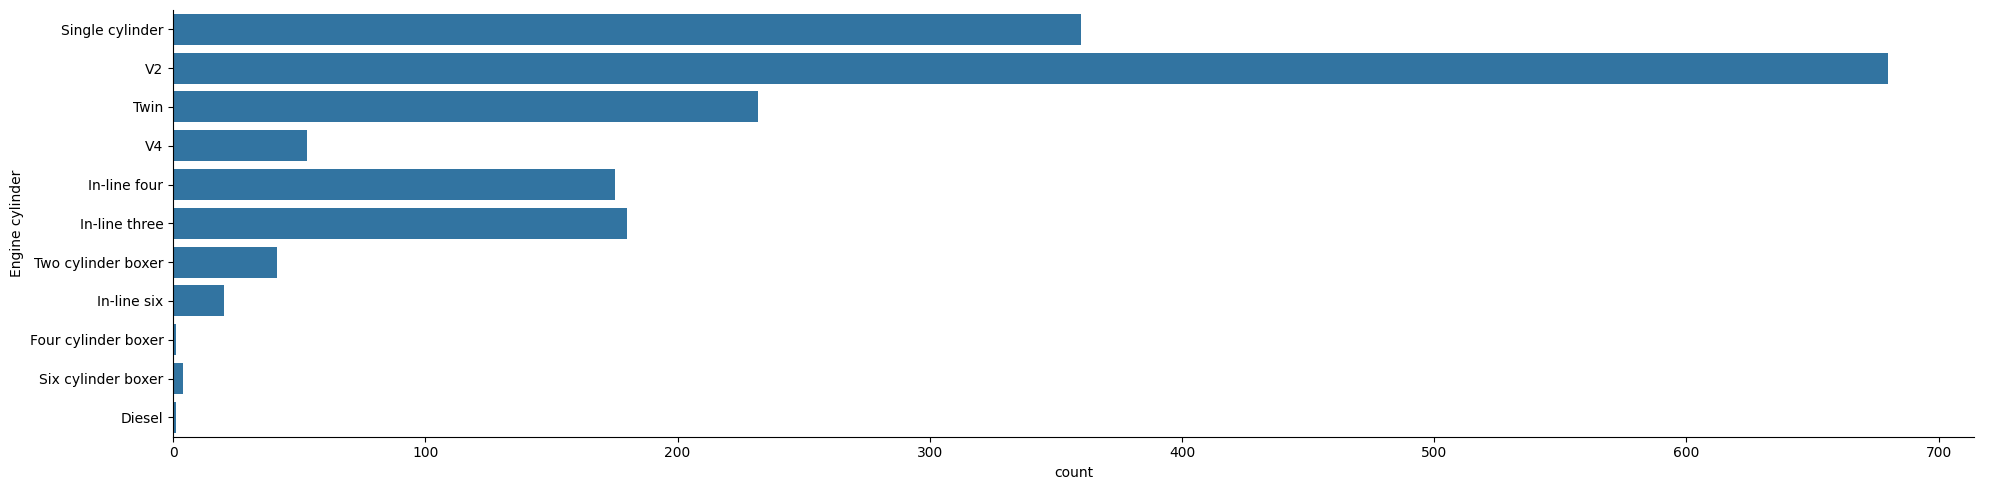

In [213]:
sns.catplot(data=main.dropna(),y='Engine cylinder',kind='count',aspect=4)